In [1]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [2]:
listings=pd.read_csv('D:\MASTER_ENC\mini_memoire/res_tactiques2/listings_zsc_tactics8.csv', sep=',', on_bad_lines='skip', encoding='utf-8')
print(len(listings))
print(listings.columns[-30:])

C:\Users\123\AppData\Local\Temp\ipykernel_4996\1346825462.py:1: DtypeWarning: Columns (63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  listings=pd.read_csv('D:\MASTER_ENC\mini_memoire/res_tactiques2/listings_zsc_tactics8.csv', sep=',', on_bad_lines='skip', encoding='utf-8')


37014
Index(['cosmopolitan', 'international view', 'cultural exchange',
       'personal life', 'life experiences', 'divers interests', 'hobbies',
       'enjoy life', 'meet new people', 'welcoming', 'friendly', 'sociable',
       'interpersonal interaction', 'thoughtful service', 'attentive to needs',
       'willing to help', 'responsive', 'fan of Airbnb', 'Airbnb community',
       'love Airbnb', 'travel with Airbnb', 'len_squared',
       'host_location_paris', 'langue_fr', 'openness', 'authenticity',
       'sociability', 'self_promotion', 'exemplification',
       'professional_host'],
      dtype='object')


In [3]:
cols_labels=['open to different cultures', 'cosmopolitan', 'international view','cultural exchange',
                       'personal life', 'life experiences','divers interests', 'hobbies', 'enjoy life', 
                    'meet new people', 'welcoming', 'friendly', 'sociable', 'interpersonal interaction',
                     'thoughtful service', 'attentive to needs', 'willing to help','responsive', 
                     'fan of Airbnb', 'Airbnb community', 'love Airbnb','travel with Airbnb']
cols_tactics=['openness', 'authenticity','sociability', 'self_promotion', 'exemplification']

labels2tac={
    "openness":['open to different cultures','cosmopolitan','international view','cultural exchange'], 
    "authenticity":['personal life','life experiences','divers interests','hobbies','enjoy life'], 
    'sociability':['meet new people', 'welcoming', 'friendly','sociable', 'interpersonal interaction',],
    'self_promotion':['thoughtful service', 'attentive to needs','willing to help','responsive'],
    'exemplification':["fan of Airbnb","Airbnb community",'love Airbnb', 'travel with Airbnb']    
}    

In [4]:
print(listings[cols_tactics].describe(include='all'))

           openness  authenticity   sociability  self_promotion  \
count  37014.000000  37014.000000  37014.000000    37014.000000   
mean      -0.067998     -0.176763     -0.069275        0.146944   
std        0.617061      0.706896      0.660689        0.687755   
min       -1.867980     -1.925304     -2.142022       -1.602021   
25%       -0.047736     -0.290278      0.000000        0.000000   
50%        0.000000      0.000000      0.000000        0.000000   
75%        0.000000      0.000000      0.000000        0.288075   
max        1.750927      1.787340      1.350939        1.941181   

       exemplification  
count     37014.000000  
mean          0.039188  
std           0.664888  
min          -0.805752  
25%          -0.343198  
50%           0.000000  
75%           0.000000  
max           3.024279  


In [5]:
data= listings[cols_tactics].astype(float)

# standardiser :

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
print(X_scaled)

[[ 0.11019731  0.25005891  0.10485362 -0.21365998 -0.05893946]
 [-0.68257716  1.45869006 -0.68707302  0.64755292 -0.52824252]
 [-1.7183146  -1.30927957 -2.93826168 -1.94177172 -1.03523807]
 ...
 [ 0.11019731  0.25005891  0.10485362 -0.21365998 -0.05893946]
 [ 0.11019731  0.25005891  0.10485362 -0.21365998 -0.05893946]
 [-0.65260022 -2.01051094 -2.15478571  0.97618915 -0.81251431]]


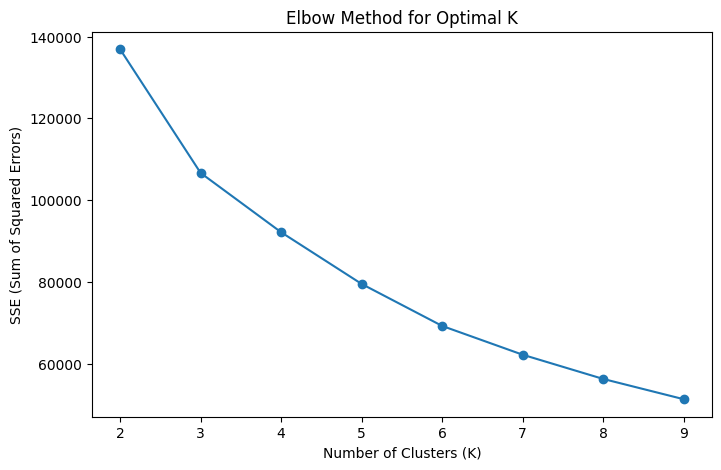

In [8]:
from sklearn.cluster import KMeans

# 计算不同 K 值的误差平方和（Elbow Method）
sse = []
for k in range(2, 10):  # 选择 2 到 10 组进行尝试
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# 画出肘部法则图
plt.figure(figsize=(8,5))
plt.plot(range(2, 10), sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [16]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)#***
data['cluster'] = kmeans.fit_predict(X_scaled)
print(f'when k={k}:\n {data["cluster"].value_counts()}')

when k=5:
 cluster
0    23281
4     4339
1     3864
3     2967
2     2563
Name: count, dtype: int64


# PCA visualisation:

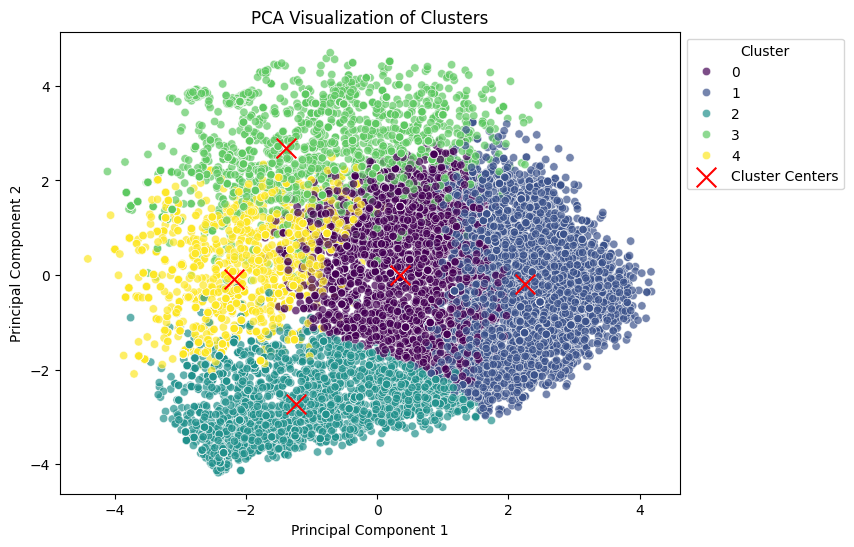

Explained variance by first 2 components: 0.69


In [17]:
from sklearn.decomposition import PCA
#2D:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)#*

# 可视化聚类结果
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['cluster'], palette='viridis', alpha=0.7)#*


# 标记聚类中心
centers_pca = pca.transform(kmeans.cluster_centers_)  # 把 K-Means 中心点也投影到 PCA 低维空间
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='x', s=200, label="Cluster Centers")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Clusters')
plt.legend(title="Cluster",loc="upper left", bbox_to_anchor=(1, 1))
plt.show()
print(f"Explained variance by first 2 components: {pca.explained_variance_ratio_.sum():.2f}")

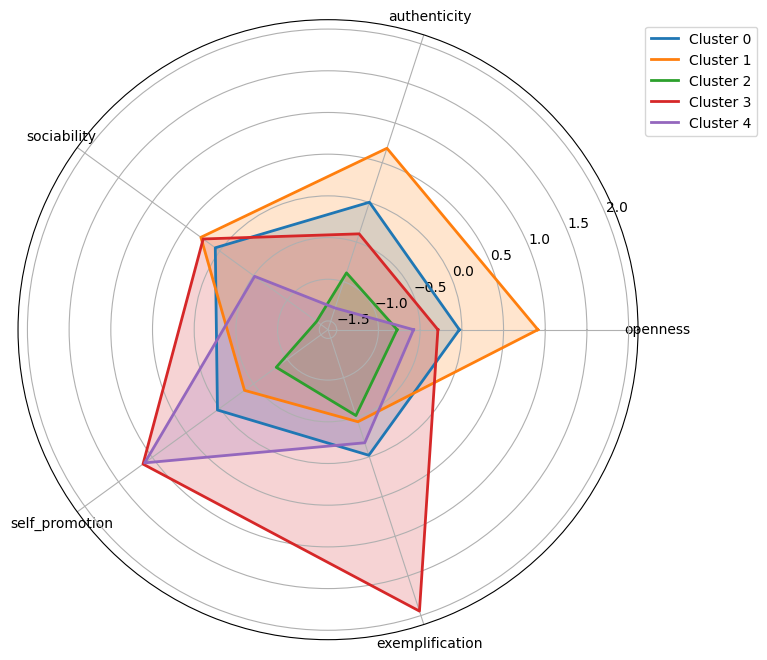

In [18]:
# 计算每个类别在不同策略上的均值
cluster_means = data.groupby("cluster")[cols_tactics].mean()

# 画雷达图
labels = cluster_means.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # 闭合雷达图

fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(polar=True))

for i, row in cluster_means.iterrows():
    values = row.tolist()
    values += values[:1]  # 闭合雷达图
    ax.plot(angles, values, label=f"Cluster {i}", linewidth=2)
    ax.fill(angles, values, alpha=0.2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
#plt.title('Cluster Characteristics (Radar Chart)')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()